In [1]:
# %pip install numpy
# %pip install pandas
# %pip install seaborn
# %pip install plotly-express
# %pip install jinja2
# %pip install matplotlib
# %pip install geopy
# %pip install nbformat

<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border:5px solid #4AD3FF"> Table of Contents</h2>

1. [Import necessary Libaries](#imports)
2. [Read the Dataset](#dataset)<br>
    2.1. [Dataset Description](#dataset_des)
3. [Data Exploration](#data_expo)
4. [Feature Enginnering](#feat_eng)
5. [Data Cleaning](#data_clean)
    5.1. [Remove Null Values and Outliers](#c1)<br>
6. [Data Analysis](#data_ana)<br>
    6.1. [Visualize the number Layoffs in these Years](#v1)<br>
    6.2. [Enhanced scatter plot for layoffs vs. funds raised colored by industry](#v2)<br>    
    6.3. [Get the insights of the Layoffs groupby to their Continents](#insi1)<br>
    6.4. [Lets, visualize these countries](#v4)<br>
    6.5. [Get the insights of the company with 100% layoff rate](#insi2)<br>
    6.6. [Trend of Layoffs](#insi3)<br>
    6.6.1 [Cumulative Trend in Layoffs](#v9)<br>    
    6.7. [Divide the dataframe into 4 Groups](#divide_4grp)<br>
    6.7.1 [Visualize the different types of Industries in the Group 4](#v3)<br>
    6.7.2 [Lets, see the Top 10 companies with the most layoffs in the group 4 (154-11000 layoff count)](#insi4)<br>
    6.7.2a [Visualize the Top10 Layoff Count and Location](#v8)<br>
    <!-- 6.6.2b [Visualize the Top16 Companies Location](#v5)<br> -->
    6.7.2b [Visualize the Top10 Layoff Companies Funds Raised](#v6)<br>
7. [Conclusion](#conclusion)

<a id="imports"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">1. Import necessary Libaries</h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns
palette = sns.color_palette("rainbow", 8)

<a id="dataset"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">2. Read the Dataset</h2>

In [3]:
df = pd.read_csv("../dataset/layoffs_data.csv")
clean_df = pd.read_csv("../dataset/cleaned.csv")
df.head().style.set_properties(**{'background-color': '#E1F8FF','color': '#000','border': '1px solid #4AD3FF'})

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,Fisker,Los Angeles,Transportation,0.150000,2024-02-29,https://techcrunch.com/2024/02/29/fisker-layoffs-cash-going-concern-dealerships/,1700.000000,Post-IPO,2024-02-29 23:35:20,United States,nan,Unknown
1,Electronic Arts,SF Bay Area,Consumer,0.050000,2024-02-28,https://www.cnbc.com/2024/02/28/ea-layoffs-company-to-cut-5percent-of-workforce-or-about-670-employees.html,2.000000,Post-IPO,2024-02-29 00:45:00,United States,670.000000,Unknown
2,Vacasa,Portland,Travel,0.050000,2024-02-28,https://www.oregonlive.com/business/2024/02/portland-based-vacasa-will-lay-off-another-320-new-year-is-off-to-a-difficult-start.html,834.000000,Post-IPO,2024-02-29 17:22:37,United States,320.000000,Unknown
3,Treasury Prime,SF Bay Area,Finance,0.400000,2024-02-28,https://www.bankingdive.com/news/treasury-prime-lay-off-40-50-employees-marketing-liaison-direct-fintech-partner-chris-dean/708770/,71.000000,Series C,2024-02-29 00:48:03,United States,40.000000,Unknown
4,Motional,Boston,Transportation,0.050000,2024-02-28,https://techcrunch.com/2024/02/28/hyundai-backed-autonomous-company-motional-cuts-5-of-workforce/,nan,Unknown,2024-02-28 18:50:58,United States,nan,Unknown


<a id="dataset_des"></a>
<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">2.1 Dataset Description</h3>

1. Company - Name of the Company
2. Location - Location of the Company
3. Industry - Type of Industry the company is
4. Layoffs - Total count
5. Percentage - Percentage of layoff
6. Date - Date of layoff
7. Source - Data gathered from source
8. Funds_Raised - Total funds raised
9. Stage - Stage of the company
10. Date_Added - data added in database
11. Country - Country of company located
12. List_of_Employees_Laid_Off - link to g_docs of employee list

<a id="data_expo"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">3. Data Exploration</h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3485 non-null   object 
 1   Location_HQ                 3485 non-null   object 
 2   Industry                    3485 non-null   object 
 3   Percentage                  2245 non-null   float64
 4   Date                        3485 non-null   object 
 5   Source                      3485 non-null   object 
 6   Funds_Raised                3115 non-null   float64
 7   Stage                       3485 non-null   object 
 8   Date_Added                  3485 non-null   object 
 9   Country                     3485 non-null   object 
 10  Laid_Off_Count              2290 non-null   float64
 11  List_of_Employees_Laid_Off  3484 non-null   object 
dtypes: float64(3), object(9)
memory usage: 326.8+ KB


In [5]:
df.isna().sum()

Company                          0
Location_HQ                      0
Industry                         0
Percentage                    1240
Date                             0
Source                           0
Funds_Raised                   370
Stage                            0
Date_Added                       0
Country                          0
Laid_Off_Count                1195
List_of_Employees_Laid_Off       1
dtype: int64

In [6]:
df.shape

(3485, 12)

In [7]:
df.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,2245.000000,3115.000000,2290.000000
mean,0.278106,776.946387,250.860699
std,0.283833,4800.136787,780.128866
min,0.000000,0.000000,3.000000
25%,0.100000,51.000000,40.000000
50%,0.170000,165.000000,80.000000
75%,0.300000,462.000000,185.750000
max,1.000000,121900.000000,12000.000000


<a id="feat_eng"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">4. Feature Engineering</h2>

Now, lets create a new column named 'year_of_laidoff' which will tell us on which layoff happend

In [8]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month/year
df['year_month'] = df['Date'].dt.strftime('%m/%Y')

# Extract quarter/year
df['quarter'] = df['Date'].dt.to_period('Q')

# Extract year
df['year'] = df['Date'].dt.year

<a id="data_clean"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">5. Data Cleaning</h2>

<br>
Lets, with some cleanup...<br>
We don't need the Source(data gathered from source), Date_Added(data added in database), and List_of_Employees_Laid_Off - link to g_docs of employee list

In [9]:
df.drop(['Source', 'Date_Added', 'List_of_Employees_Laid_Off'], axis=1, inplace=True)
df.dropna(inplace = True)
df.rename(columns = {'Laid_Off_Count': 'Layoffs'}, inplace = True)

In [10]:
df.columns

Index(['Company', 'Location_HQ', 'Industry', 'Percentage', 'Date',
       'Funds_Raised', 'Stage', 'Country', 'Layoffs', 'year_month', 'quarter',
       'year'],
      dtype='object')

<a id="c1"></a>
<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">5.1. Remove Null Values and Outliers</h3>

In [11]:
df = df[df['Layoffs'].notna()]

In [12]:
def detect_outliers(df, column_names):
    """
    Detect outliers in the specified columns of a DataFrame and visualize the results.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column_names (list): A list of column names to analyze for outliers.

    Returns:
    - pd.DataFrame: A DataFrame containing information about outliers for each specified column.
      Columns: ['Column', 'Number of Outliers', '% Outliers', 'Lower Limit', 'Upper Limit']
    """

    # Calculate the number of columns and rows for subplots
    col_len = len(column_names)
    num_columns = min(col_len, 3)
    num_rows = 2 * ((col_len + num_columns - 1) // num_columns)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 3 * num_rows), squeeze = False)

    # Initialize a list to store outlier information for each column
    outlier_data = []

    # Iterate over column_names and create subplots
    for i, column_name in enumerate(column_names):
        data = df[column_name]

        # Calculate quartiles and interquartile range using np.percentile
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1

        # Define lower and upper limits for outlier detection
        low_lim, upp_lim = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        # Find and display outliers
        outliers = df[(data < low_lim) | (data > upp_lim)][column_name]
        num_outliers = len(outliers)
        percent_outliers = round(num_outliers / len(df) * 100, 1)

        # Append outlier information to the list
        outlier_data.append([column_name, num_outliers, percent_outliers, round(low_lim, 1), round(upp_lim, 1)])

        # Calculate row and column indices for plotting
        row_index, col_index = divmod(i, num_columns * 2)

        # Create a boxplot to visualize the distribution and detect outliers
        ax_box, ax_hist = axes[row_index, col_index], axes[row_index + 1, col_index]
        sns.boxplot(x = data, ax = ax_box)
        ax_box.set(title = column_name.capitalize(), xlabel = None)
        ax_box.axvline(low_lim, color = 'red', linestyle = '--', label = f'Lower Limit: {low_lim:.1f}')
        ax_box.axvline(upp_lim, color = 'red', linestyle = '--', label = f'Upper Limit: {upp_lim:.1f}')
        ax_box.legend()

        # Create a histogram below the boxplot
        sns.histplot(data, bins = 20, ax = ax_hist, color = '#FF8C00')
        ax_hist.set(xlabel = None)
        ax_hist.set_yscale('log')  # Set y-axis scale to logarithmic
        ax_hist.set_ylabel(None)  # Disable y-axis label

    # Display the subplots
    plt.tight_layout()
    plt.show()

    # Combine the outlier information into a DataFrame
    outlier_df = pd.DataFrame(outlier_data, columns = ['Column', 'Number of Outliers', '% Outliers', 'Lower Limit', 'Upper Limit'])
    return outlier_df

c:\Users\670310840\Downloads\Documents\GitHub\Layoffs\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\670310840\Downloads\Documents\GitHub\Layoffs\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\670310840\Downloads\Documents\GitHub\Layoffs\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


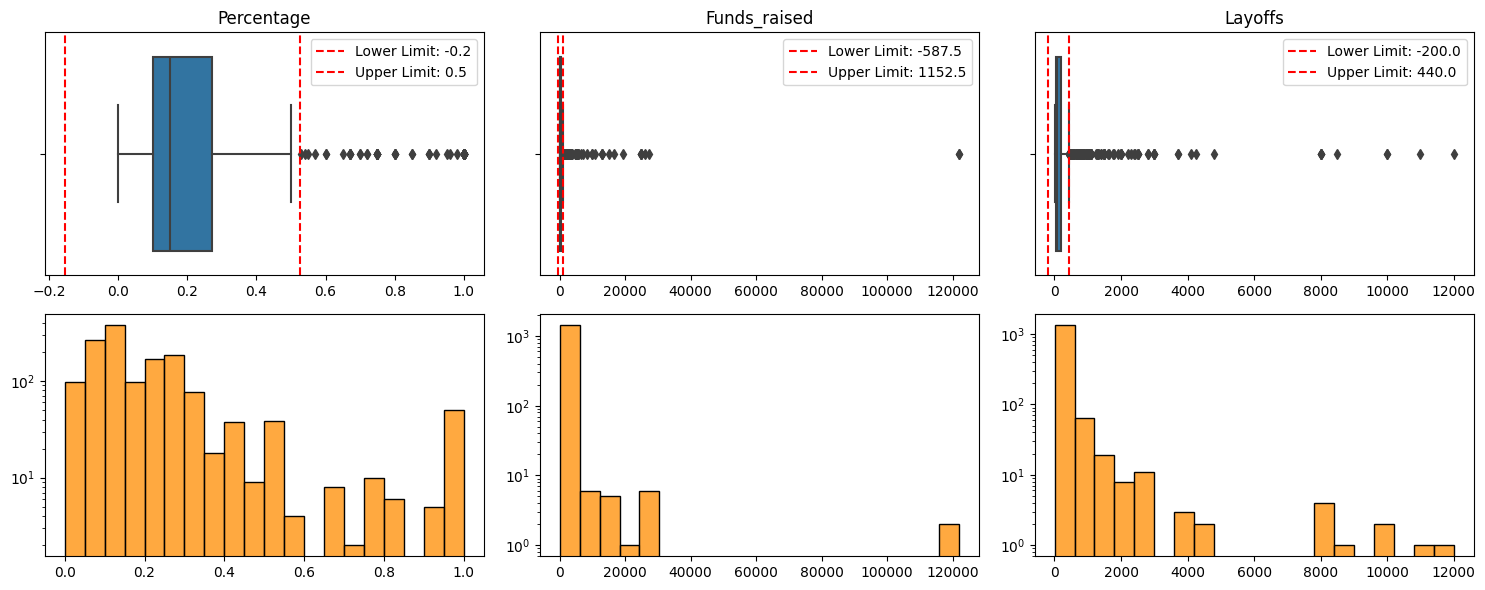

,Column,Number of Outliers,% Outliers,Lower Limit,Upper Limit
0,Percentage,87,5.9,-0.2,0.5
1,Funds_Raised,158,10.8,-587.5,1152.5
2,Layoffs,164,11.2,-200.0,440.0


In [13]:
outlier_col = df.select_dtypes(include = 'float').columns
detect_outliers(df, outlier_col)

In [14]:
# I'm removing 133 rows of outliers. Previously had 2,738 rows and cleaned 64% of the data.
df = df.query('Percentage < 0.6 and Funds_Raised < 1108.2 and Layoffs < 416.2')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 2 to 3483
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Company       1145 non-null   object        
 1   Location_HQ   1145 non-null   object        
 2   Industry      1145 non-null   object        
 3   Percentage    1145 non-null   float64       
 4   Date          1145 non-null   datetime64[ns]
 5   Funds_Raised  1145 non-null   float64       
 6   Stage         1145 non-null   object        
 7   Country       1145 non-null   object        
 8   Layoffs       1145 non-null   float64       
 9   year_month    1145 non-null   object        
 10  quarter       1145 non-null   period[Q-DEC] 
 11  year          1145 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(6), period[Q-DEC](1)
memory usage: 111.8+ KB


In [15]:
df.head()
df.to_csv("../dataset/cleaned.csv")

<a id="data_ana"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6. Data Analytics</h2>

In [16]:
df = pd.read_csv("../dataset/layoffs_data.csv")
clean_df = pd.read_csv("../dataset/cleaned.csv")

<a id="v1"></a>
<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">6.1. Visualize the number Layoffs in these Years</h3>

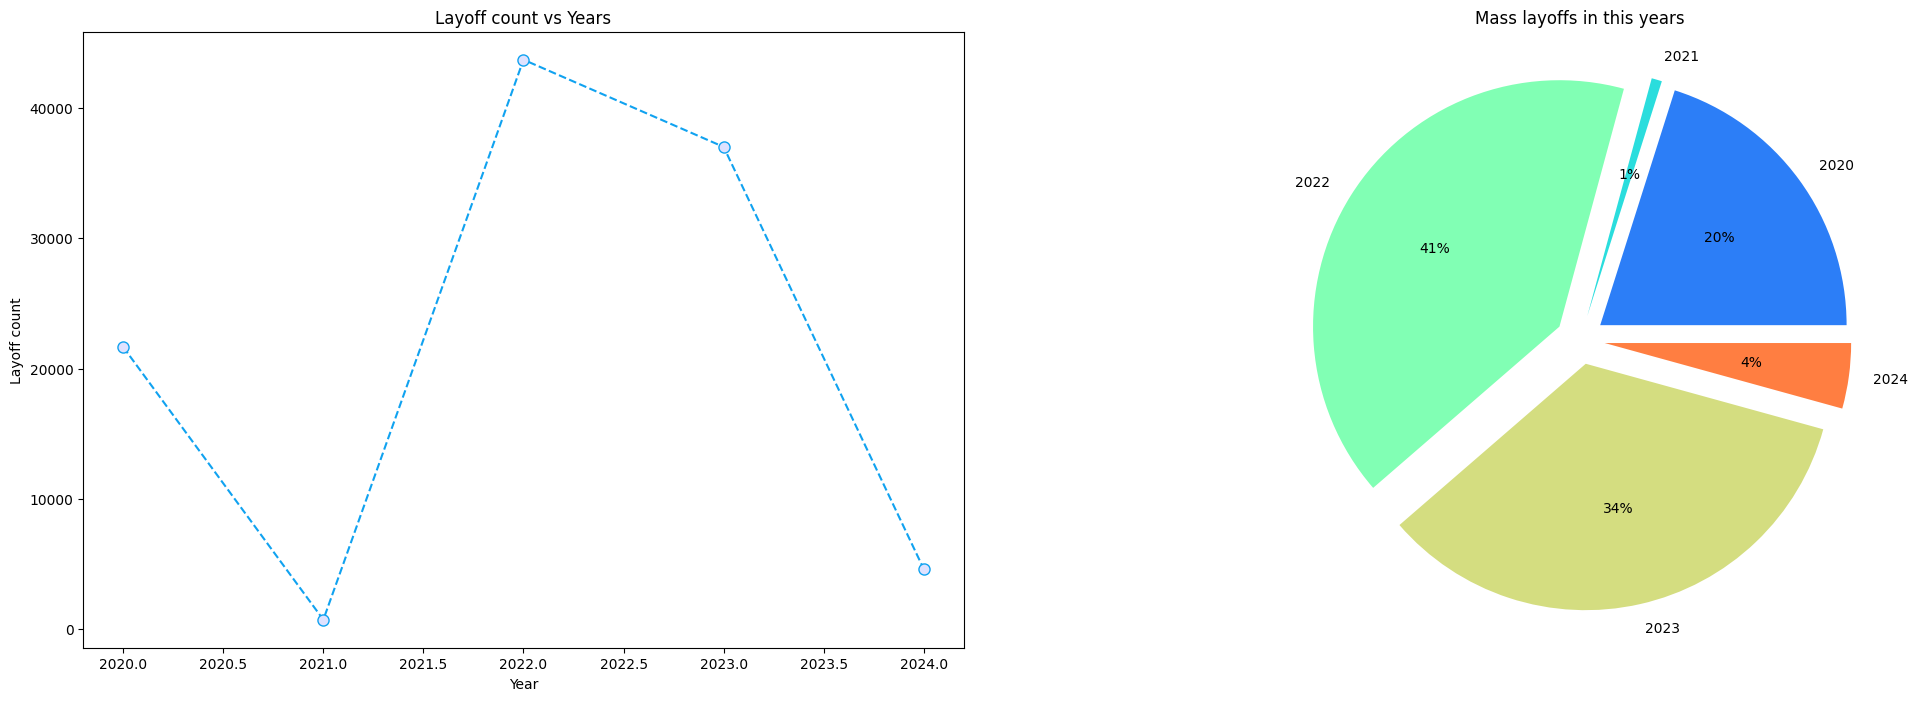

In [17]:
plt.figure(figsize=(25, 8))
laidOff_countYear = clean_df.drop(columns=["Date","year_month",'quarter']).groupby('year', as_index=False).sum()

plt.subplot(1, 2, 1)

plt.plot(laidOff_countYear['year'], laidOff_countYear['Layoffs'], marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xlabel('Year')
plt.ylabel('Layoff count')
plt.title("Layoff count vs Years")

plt.subplot(1, 2, 2)

explode = [0.1] * len(laidOff_countYear)  # Explode all slices
palette = sns.color_palette("rainbow", len(laidOff_countYear))

plt.pie(x=laidOff_countYear['Layoffs'], labels=laidOff_countYear['year'], autopct='%.f%%',
        explode=explode, colors=palette)
plt.title("Mass layoffs in this years")

plt.show()

<a id="v2"></a>
<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">6.2. Enhanced scatter plot for layoffs vs. funds raised colored by industry</h3>

In [18]:
# Enhanced scatter plot for layoffs vs. funds raised colored by industry
fig_funds = px.scatter(
    clean_df,
    x = 'Funds_Raised',
    y = 'Layoffs',
    title = 'Layoffs vs. Funds Raised by Industry',
    color = 'Industry',
    hover_name = 'Company',
    labels = {'Funds_Raised': 'Funds Raised in Millions'}
)

# Formatting title and x-axis
fig_funds.update_layout(
    title_x = 0.5,
    xaxis_tickprefix = '$',
    xaxis_tickformat = ',.0f'
)

fig_funds.update_traces(marker = {'line': {'color': '#800080', 'width': 1}})

fig_funds.show()

<a id="insi1"></a>
<h3 style="background-color:#E1F8FF; margin-bottom:0px;padding:10px; color:#000">6.3. Get the insights of the layoffs groupby to their Continents</h3>

In [22]:
laidOff_countByCountry = clean_df.drop(columns=["Date","year_month",'quarter','year']).groupby('Country', as_index=False).sum()

In [23]:
asia = ['China', 'Hong Kong', 'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Singapore', 'Thailand', 'United Arab Emirates', 'Israel']
europe = ['Austria', 'Bulgaria','Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Lithuania', 'Luxembourg', 'Norway', 
          'Poland', 'Portugal', 'Romania', 'Russia', 'Sweden', 'Switzerland', 'Netherlands', 'United Kingdom']

n_america = ['Canada', 'Mexico', 'United States']
s_america = ['Argentina', 'Brazil', 'Chile', 'Colombia']

africa = ['Estonia', 'Kenya', 'Nigeria', 'Senegal', 'Seychelles']
oceania = ['Australia', 'New Zealand']

In [24]:
asia_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(asia)]
europe_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(europe)]

nAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(n_america)]
sAmerica_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(s_america)]

africa_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(africa)]
oceania_insight = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(oceania)]

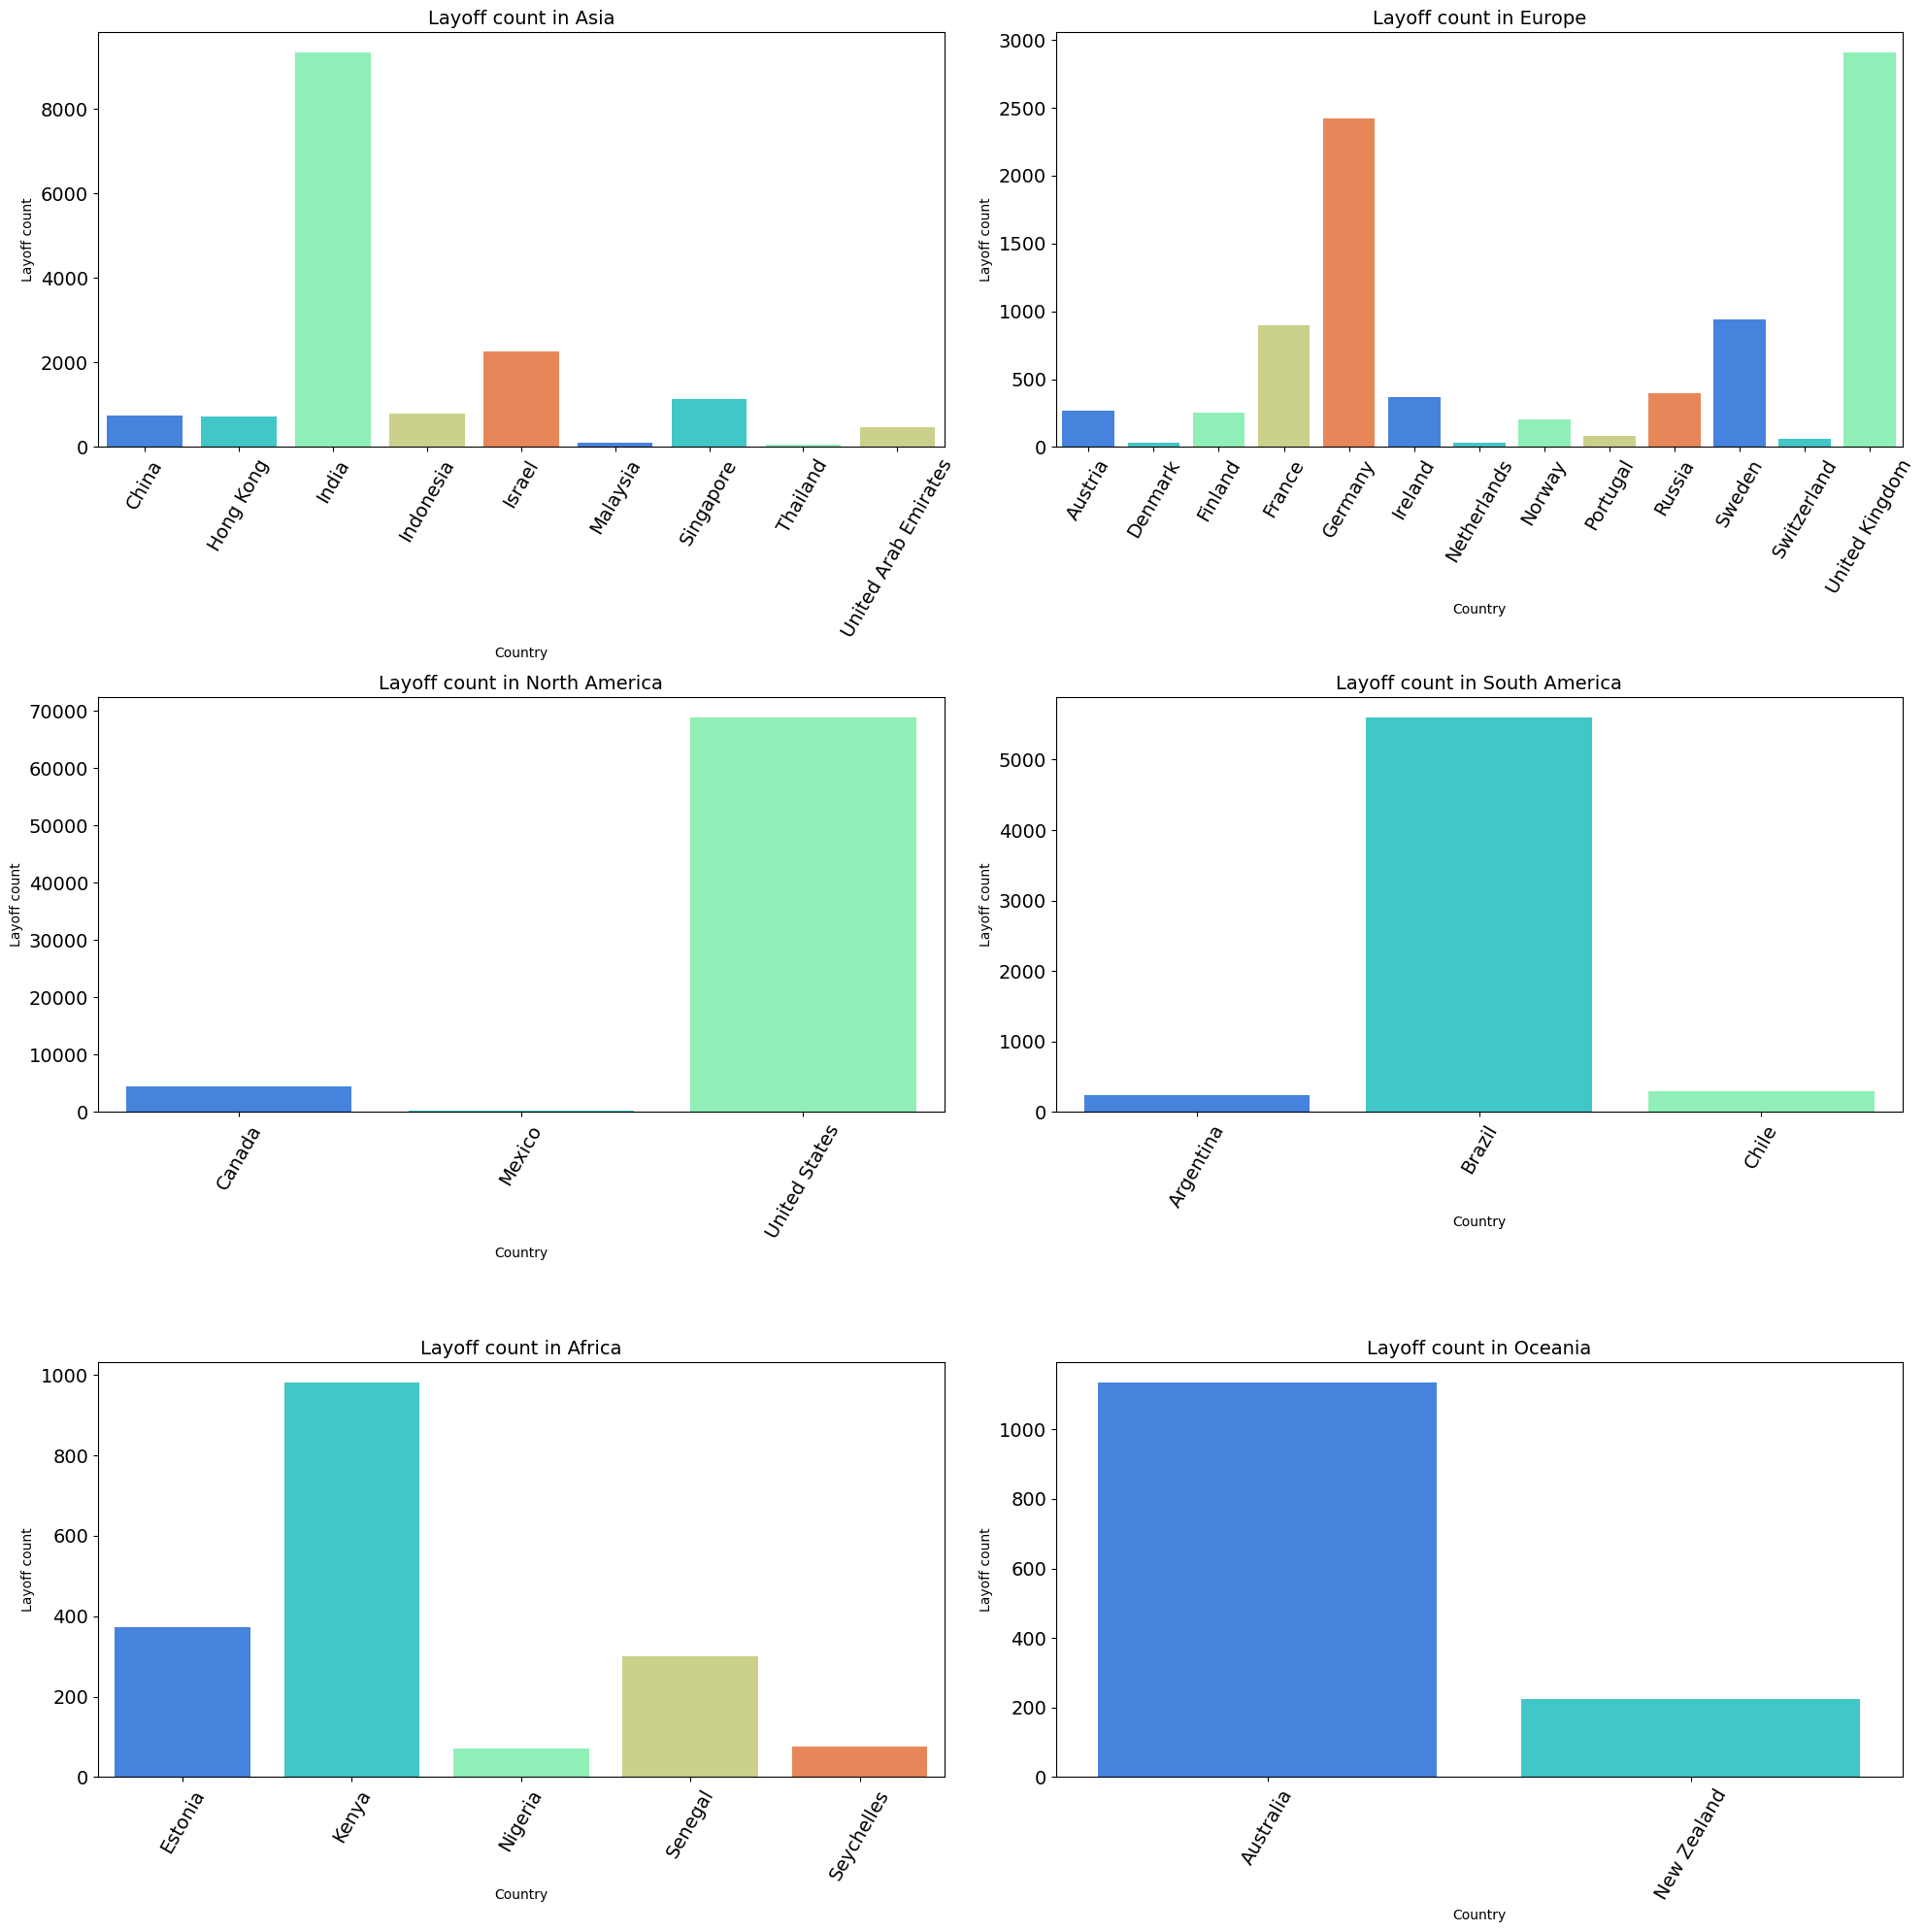

In [25]:
plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
sns.barplot(data=asia_insight, y=asia_insight['Layoffs'], x=asia_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Asia", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 2)
sns.barplot(data=europe_insight, y=europe_insight['Layoffs'], x=europe_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Europe", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 3)
sns.barplot(data=nAmerica_insight, y=nAmerica_insight['Layoffs'], x=nAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in North America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 4)
sns.barplot(data=sAmerica_insight, y=sAmerica_insight['Layoffs'], x=sAmerica_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in South America", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 5)
sns.barplot(data=africa_insight, y=africa_insight['Layoffs'], x=africa_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Africa", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.subplot(3, 2, 6)
sns.barplot(data=oceania_insight, y=oceania_insight['Layoffs'], x=oceania_insight['Country'], palette=palette)
plt.xticks(rotation = 60)
plt.xlabel('Country'), plt.ylabel('Layoff count')
plt.title("Layoff count in Oceania", fontsize=14), plt.xticks(fontsize=14), plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

so, from the above visualization we can see that ***India, Germany, Netherlands, Sweden, United Kingdom, United States, Nigeria, and Australia*** are the countries to get most of the layoffs


<a id="v4"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.3. Lets, visualize these countries</h2>

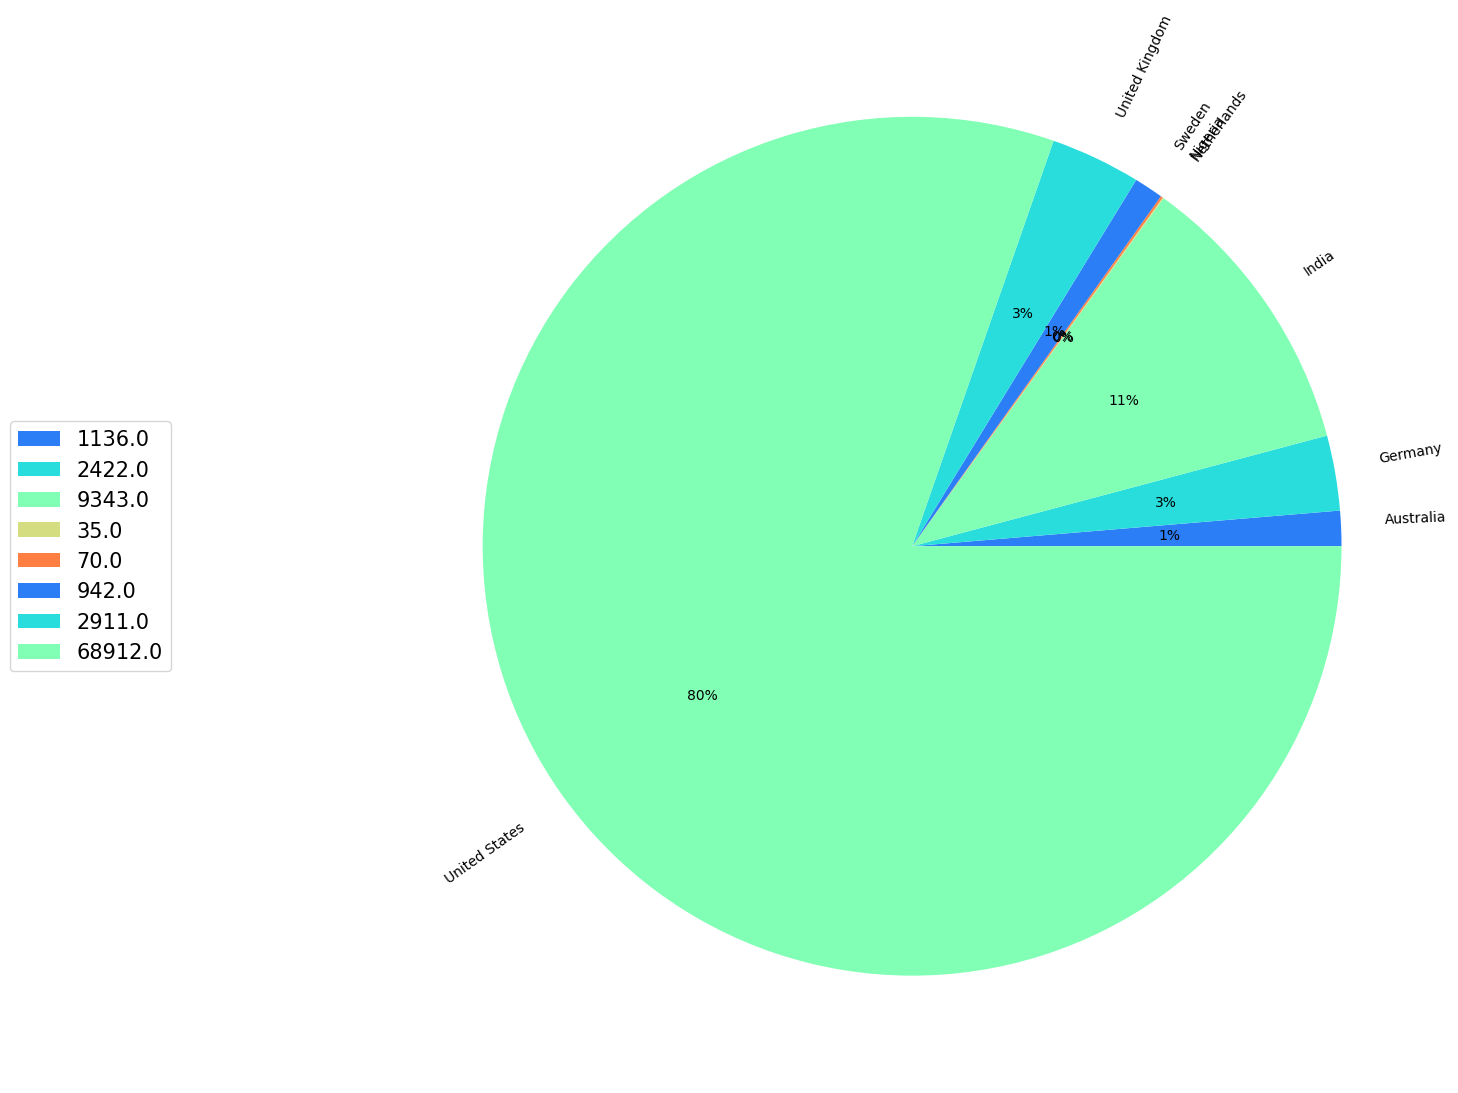

In [26]:
mass_layoff_countries_list = ['India', 'Germany', 'Netherlands', 'Sweden', 'United Kingdom', 'United States', 'Nigeria', 'Australia']

mass_layoff_countries = laidOff_countByCountry.loc[laidOff_countByCountry['Country'].isin(mass_layoff_countries_list)]

plt.figure(figsize=(15, 20))
plt.pie(data=mass_layoff_countries, x=mass_layoff_countries['Layoffs'], labels=mass_layoff_countries['Country'],
        autopct='%.f%%', colors=palette, rotatelabels=True, wedgeprops = {'linewidth': 3})
plt.legend(mass_layoff_countries['Layoffs'], loc='center left', bbox_to_anchor=(-0.35, .5), fontsize=15)
plt.xticks(fontsize=50), plt.yticks(fontsize=50)
plt.tight_layout()
plt.show()

<a id="insi2"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.4. Get the insights of the company with <strong>100% layoff rate</strong> </h2>

In [27]:
insight_1 =df.loc[df['Percentage'] == 1.00].dropna()
insight_1.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
56,Drizly,Boston,Retail,1.0,2024-02-05,https://www.boston.com/news/business/2024/02/0...,119.0,Acquired,2024-02-06 04:36:32,United States,168.0,Unknown
193,Frontdesk,Milwaukee,Travel,1.0,2024-01-02,https://techcrunch.com/2024/01/02/short-term-r...,26.0,Unknown,2024-01-03 02:38:00,United States,200.0,Unknown
232,Zulily,Seattle,Retail,1.0,2023-12-08,https://www.geekwire.com/2023/zulilys-closure-...,194.0,Acquired,2023-12-08 18:06:12,United States,839.0,Unknown
239,ZestMoney,Bengaluru,Finance,1.0,2023-12-05,https://techcrunch.com/2023/12/05/goldman-sach...,120.0,Series C,2023-12-06 00:10:02,India,150.0,Unknown
345,Convoy,Seattle,Logistics,1.0,2023-10-19,https://www.geekwire.com/2023/convoy-collapse-...,1100.0,Series E,2023-10-19 00:45:08,United States,500.0,https://docs.google.com/spreadsheets/d/1mFF3W7...


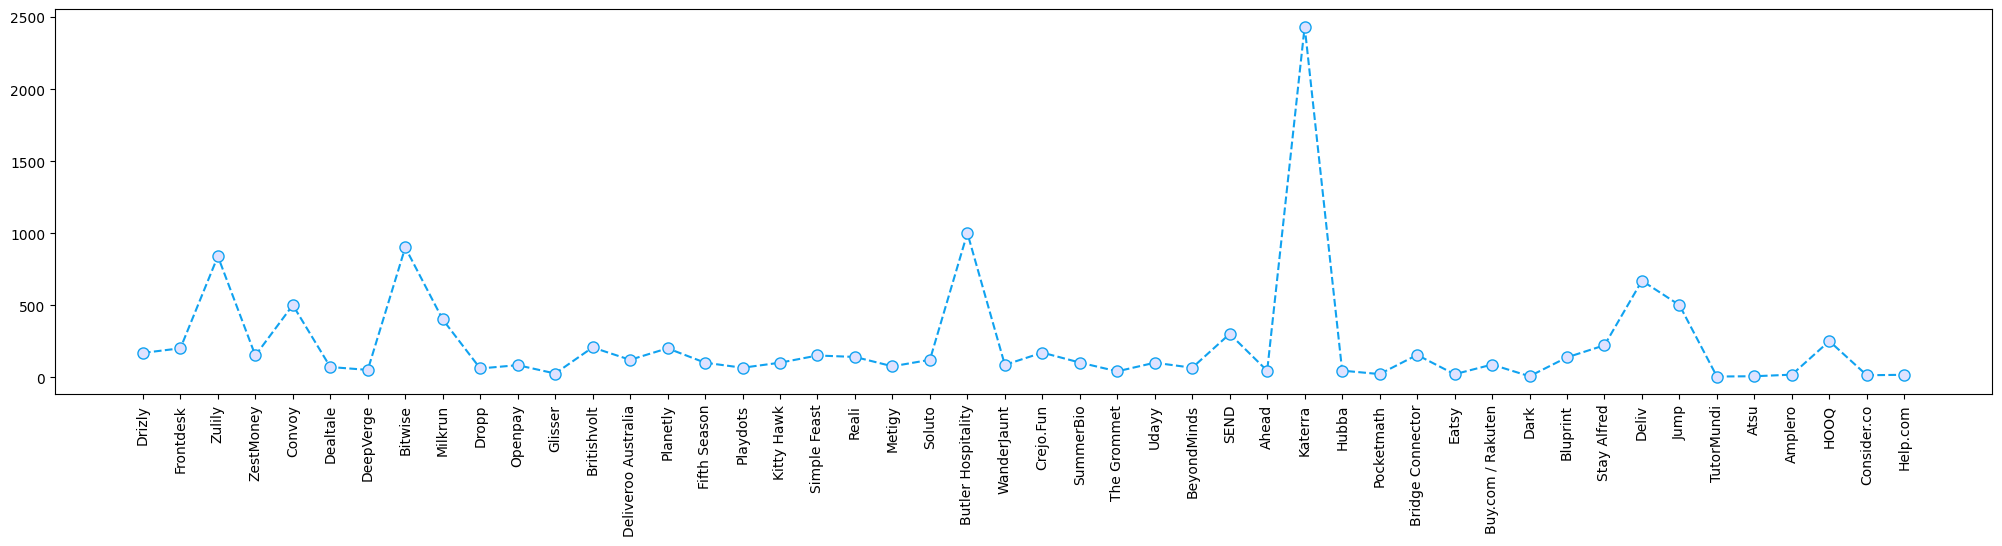

In [28]:
plt.figure(figsize=(25,5))

plt.plot(insight_1['Company'], insight_1['Laid_Off_Count'], marker="o", linestyle='--', color='#10a2f0', 
         markerfacecolor='#dfe2ff', markersize=8)
plt.xticks(rotation = 90)

plt.show()

<a id="insi3"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px;padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.6. Trend of Layoffs <strong>100% layoff rate</strong> </h2>

In [29]:
# Convert the 'Date' column to a datetime format
clean_df.loc[:, 'Date'] = pd.to_datetime(clean_df['Date'])

# Group by date and sum the layoffs
date_layoffs = (
    clean_df
    .groupby('Date')['Layoffs']
    .sum()
    .reset_index()
)

# Time series plot for layoffs over time
fig_date = px.line(
    date_layoffs,
    x = 'Date',
    y = 'Layoffs',
    title = 'Trend of Layoffs',
    template = 'plotly_dark'
)

fig_date.update_layout(title_x = 0.5)
fig_date.update_traces(line_color = 'orange')

fig_date.show()

<a id="v9"></a>
<h4 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.6.1 Cumulative Trend in Layoffs</h4>

In [30]:
# Calculate cumulative layoffs over time
df_sorted_date = clean_df.sort_values(by = 'Date')
df_sorted_date['Cumulative_Layoffs'] = df_sorted_date['Layoffs'].cumsum()

# Enhanced time series for cumulative layoffs over time
fig_cum_date = px.line(
    df_sorted_date,
    x = 'Date',
    y = 'Cumulative_Layoffs',
    title = 'Cumulative Layoffs Over Time',
    template = 'plotly_dark',
    labels = {'Cumulative_Layoffs': 'Cumulative Number of Layoffs'}
)

fig_cum_date.update_layout(title_x = 0.5)
fig_cum_date.update_traces(line = dict(color = 'red', width = 2.5))

fig_cum_date.show()

<a id="divide_4grp"></a>
<h2 style="background-color:#E1F8FF; margin-bottom:0px; padding:20px; color:#000; border-bottom:5px solid #4AD3FF">6.7. Divide the dataframe into <strong>4 Groups</strong></h2>
So, we can divide the data into <strong>4 groups</strong> according to their <strong>Layoff count</strong> from 3-35, 35-73, 73-154, and 154-11000

In [36]:
print(clean_df.columns)

grp1_insight = clean_df.loc[(clean_df['Layoffs'] <= 35)]
grp2_insight = clean_df.loc[(clean_df['Layoffs'] > 35) & (clean_df['Layoffs'] <= 73)]
grp3_insight = clean_df.loc[(clean_df['Layoffs'] > 75) & (clean_df['Layoffs'] <= 153)]
grp4_insight = clean_df.loc[(clean_df['Layoffs'] > 153)]

Index(['Unnamed: 0', 'Company', 'Location_HQ', 'Industry', 'Percentage',
       'Date', 'Funds_Raised', 'Stage', 'Country', 'Layoffs', 'year_month',
       'quarter', 'year'],
      dtype='object')


<a id="v3"></a>
<h4 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.7.1 Visualize the different types of Industries in the Group 4</h4>

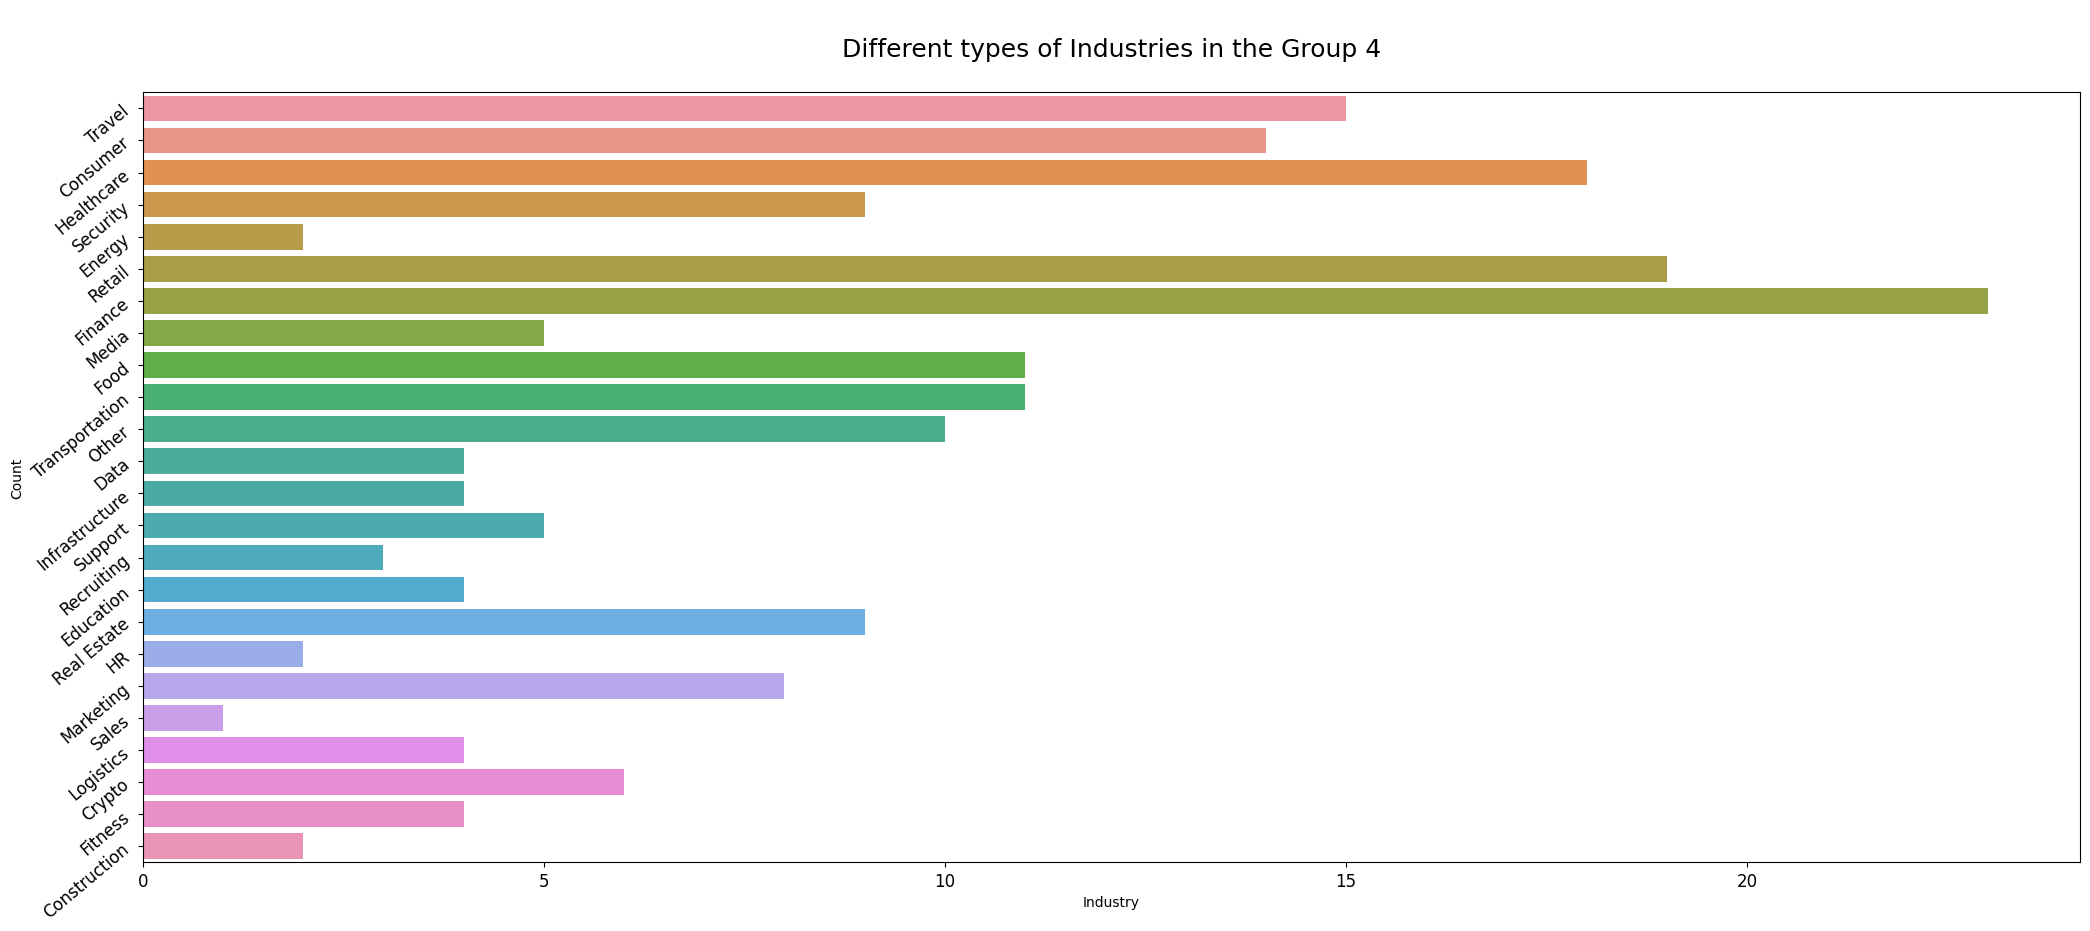

In [37]:
plt.figure(figsize=(25,10))

sns.countplot(y='Industry', data=grp4_insight)
plt.xlabel('Industry'), plt.ylabel('Count')
plt.xticks(fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nDifferent types of Industries in the Group 4\n", fontsize=18)

plt.show()

<a id="insi4"></a>
<h4 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.7.2 Lets, see the <strong>Top 10</strong> companies with the most layoffs in the group 4 (154-11000 layoff count)</h4>

In [38]:
top10_comp = grp4_insight.sort_values('Layoffs', ascending=False)
top10_comp = top10_comp.head(10)
top10_comp

,Unnamed: 0,Company,Location_HQ,Industry,Percentage,Date,Funds_Raised,Stage,Country,Layoffs,year_month,quarter,year
1113,3400,Bird,Los Angeles,Transportation,0.30,2020-03-27 00:00:00,623.0,Series D,United States,406.0,03/2020,2020Q1,2020
1131,3445,Sonder,SF Bay Area,Travel,0.33,2020-03-24 00:00:00,359.0,Series D,United States,400.0,03/2020,2020Q1,2020
843,2713,AliExpress Russia,Moscow,Retail,0.40,2022-05-14 00:00:00,60.0,Acquired,Russia,400.0,05/2022,2022Q2,2022
422,1622,Pluralsight,Salt Lake City,Education,0.20,2022-12-12 00:00:00,192.0,Acquired,United States,400.0,12/2022,2022Q4,2022
540,1961,MindBody,San Luis Obispo,Fitness,0.15,2022-10-26 00:00:00,114.0,Post-IPO,United States,400.0,10/2022,2022Q4,2022
546,1973,Cerebral,SF Bay Area,Healthcare,0.20,2022-10-24 00:00:00,462.0,Series C,United States,400.0,10/2022,2022Q4,2022
634,2235,Hootsuite,Vancouver,Marketing,0.30,2022-08-09 00:00:00,300.0,Series C,Canada,400.0,08/2022,2022Q3,2022
161,749,Grubhub,SF Bay Area,Food,0.15,2023-06-12 00:00:00,284.0,Acquired,United States,400.0,06/2023,2023Q2,2023
726,2467,Enjoy,SF Bay Area,Retail,0.18,2022-06-30 00:00:00,310.0,Post-IPO,United States,400.0,06/2022,2022Q2,2022
824,2669,SWVL,Dubai,Transportation,0.32,2022-05-30 00:00:00,132.0,Post-IPO,United Arab Emirates,400.0,05/2022,2022Q2,2022


<a id="v8"></a>
<h5 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.7.2a Visualize the Top10 <strong>Layoff Count and Location</strong></h5>

[4 1 1 1 1 1 1]


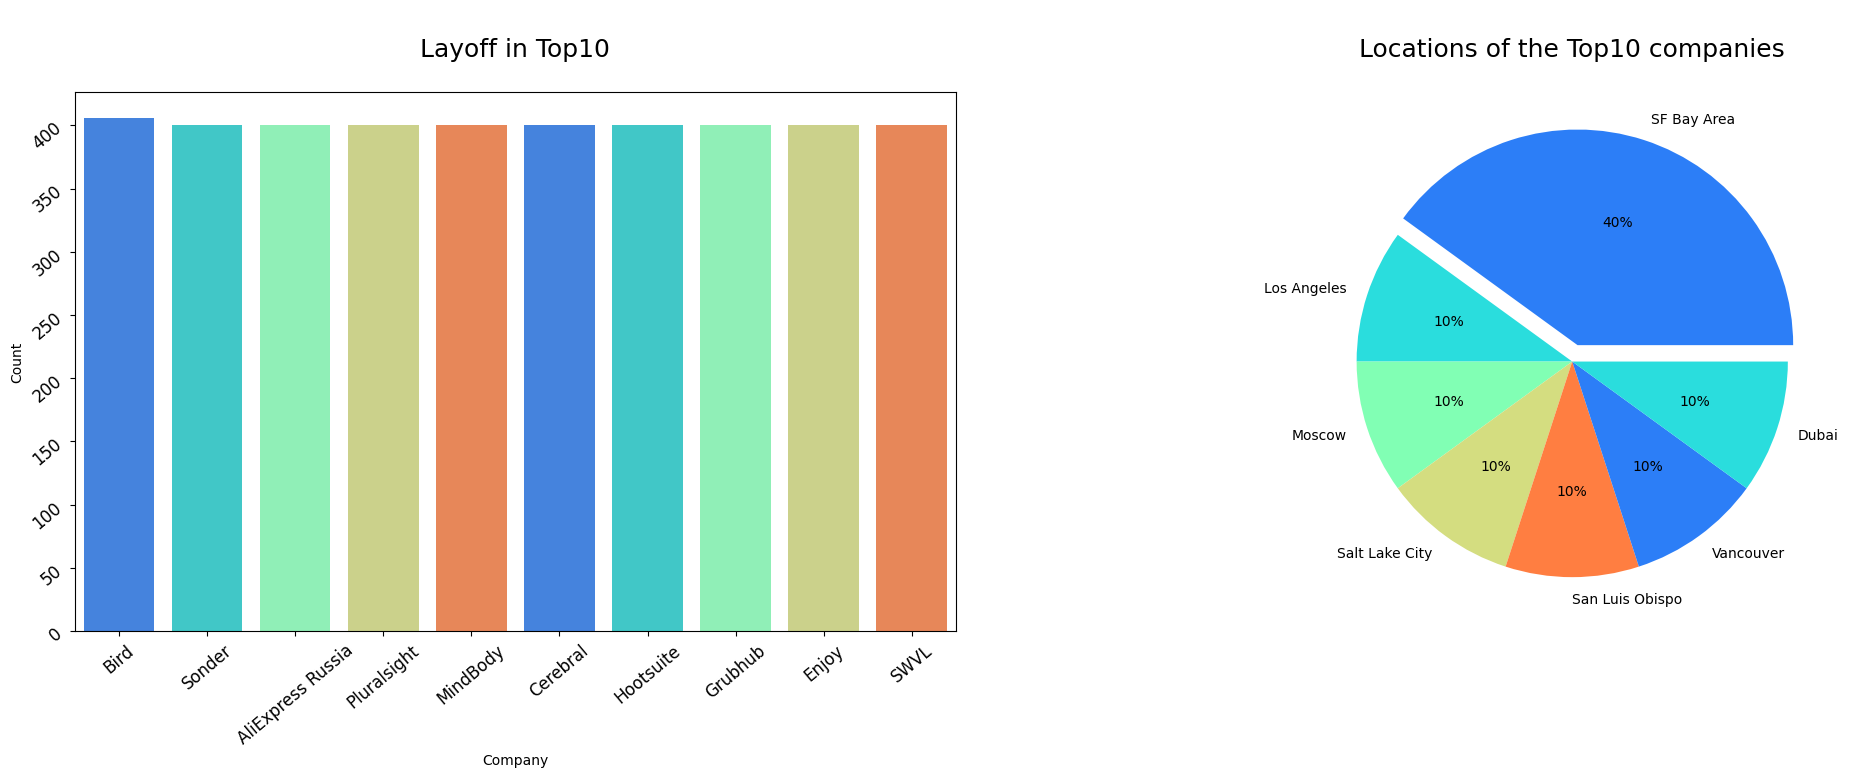

In [41]:
plt.figure(figsize=(25,7))

plt.subplot(1, 2, 1)
sns.barplot(data=top10_comp, x=top10_comp['Company'], y=top10_comp['Layoffs'], palette=palette)
plt.xlabel('Company'), plt.ylabel('Count')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nLayoff in Top10\n", fontsize=18)

plt.subplot(1, 2, 2)
top10_comp_loca = top10_comp['Location_HQ'].value_counts()
print(top10_comp_loca.values)
plt.pie(data=top10_comp, x=top10_comp_loca.values, labels=top10_comp_loca.index, autopct='%.f%%',  explode = [0.08, 0, 0, 0, 0, 0, 0], colors=palette)
plt.title("\nLocations of the Top10 companies\n", fontsize=18)

plt.show()

<a id="v6"></a>
<h5 style="background-color:#efefef; margin-bottom:0px;padding:10px; color:#000">6.7.2b Visualize the Top10 Layoff Companies <strong>Funds Raised</strong></h5>

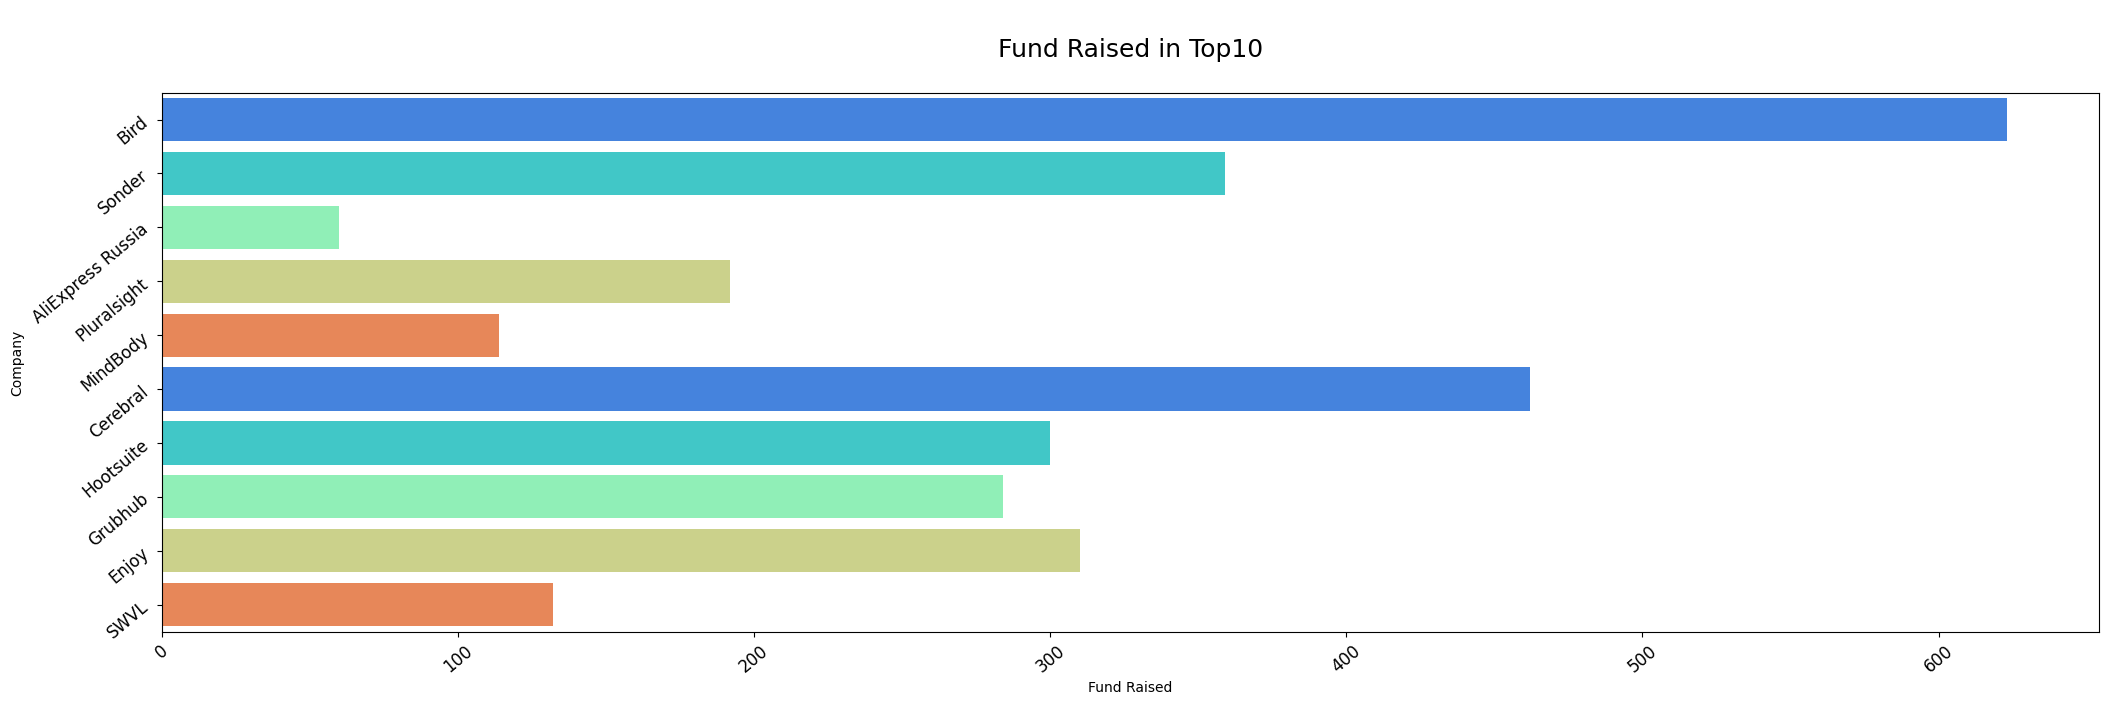

In [42]:
plt.figure(figsize=(25,7))

sns.barplot(data=top10_comp, y=top10_comp['Company'], x=top10_comp['Funds_Raised'].astype(str).astype(float), palette=palette)
plt.ylabel('Company'), plt.xlabel('Fund Raised')
plt.xticks(rotation=40, fontsize=12), plt.yticks(rotation=40, fontsize=12)
plt.title("\nFund Raised in Top10\n", fontsize=18)

plt.show()